In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


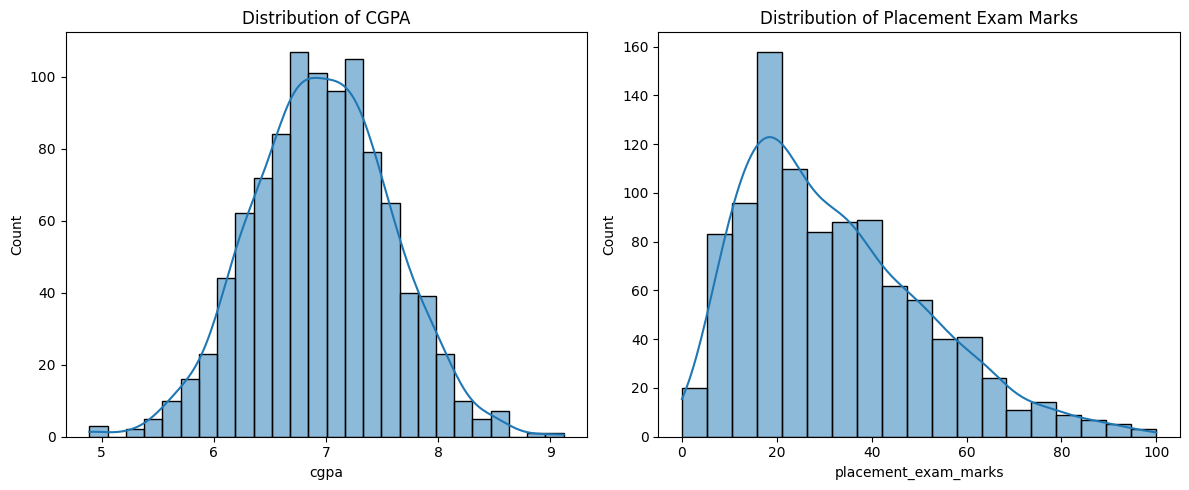

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)
plt.title('Distribution of CGPA')

plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Distribution of Placement Exam Marks')

plt.tight_layout()
plt.show()

The exam_marks column is skewed and we can use the iqr method there

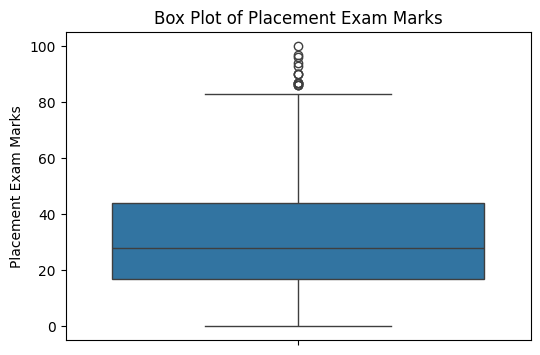

In [5]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['placement_exam_marks'])
plt.title('Box Plot of Placement Exam Marks')
plt.ylabel('Placement Exam Marks')
plt.show()

In [6]:
df.placement_exam_marks.describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [11]:
q1 = df['placement_exam_marks'].quantile(0.25)
q3 = df['placement_exam_marks'].quantile(0.75)
iqr = q3 - q1

min_val = q1 - 1.5 * iqr
max_val = q3 + 1.5 * iqr

min_val
# max_val


np.float64(-23.5)

In [12]:
#1st way

df_one = df.copy()

In [13]:
df_one = df[df.placement_exam_marks < max_val]

In [14]:
df.shape

(1000, 3)

In [15]:
df_one.shape

(985, 3)

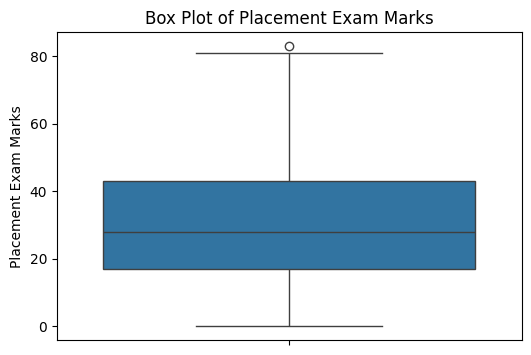

Text(0.5, 1.0, 'Distribution of CGPA')

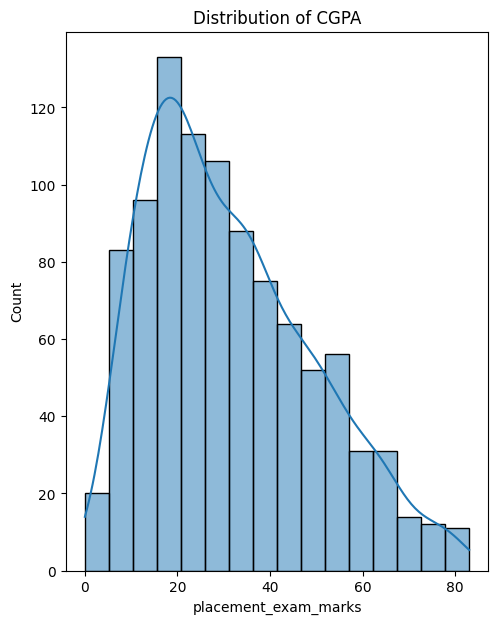

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_one['placement_exam_marks'])
plt.title('Box Plot of Placement Exam Marks')
plt.ylabel('Placement Exam Marks')
plt.show()


plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
sns.histplot(df_one['placement_exam_marks'], kde=True)
plt.title('Distribution of CGPA')

In [23]:
#second way -capping 

In [24]:
df_two = df.copy()

In [30]:
min_val
max_val

np.float64(84.5)

In [27]:
df_two.placement_exam_marks = np.where(df_two.placement_exam_marks > max_val , max_val , np.where(df_two.placement_exam_marks < min_val , min_val , df_two.placement_exam_marks))

In [28]:
df_two

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


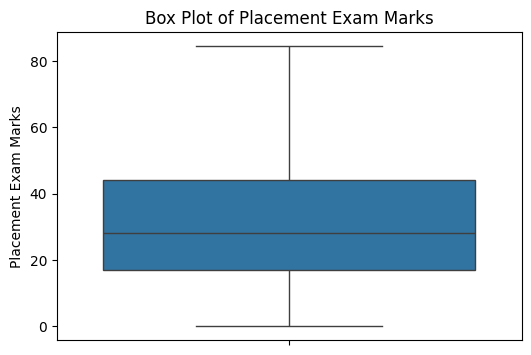

Text(0.5, 1.0, 'Distribution of CGPA')

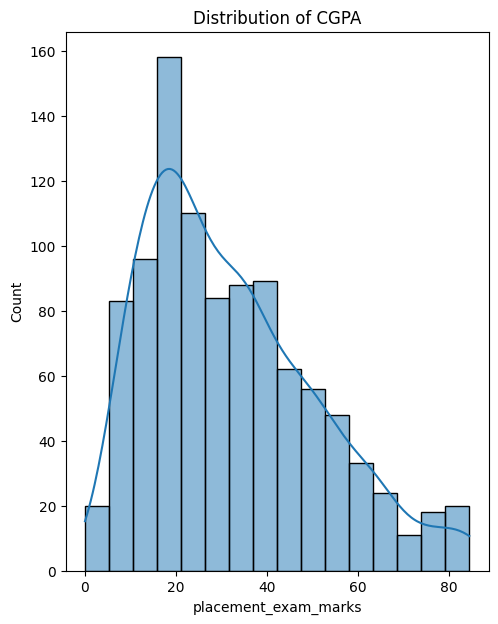

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_two['placement_exam_marks'])
plt.title('Box Plot of Placement Exam Marks')
plt.ylabel('Placement Exam Marks')
plt.show()


plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
sns.histplot(df_two['placement_exam_marks'], kde=True)
plt.title('Distribution of CGPA')